# Project: *Brazilian Medical Appointments*

## Table of Contents:-
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
we're going to explore a Brazilian medical data set for +100k patients having different ages, living in some regions in Brazil, some of the patients are hipertension, diabetec and alcoholism.
Some of the patients have medical assistance called Bolsa familia; a social welfare aid program of the Government of Brazil, part of the Fome Zero network of federal assistance aid to poor Brazilian families; and if they had children, families must ensure that the children attend school and are vaccinated, Bolsa program has more activities as well.
No-show column here has two entries; 'No' for patients who care about attending their medical scheduled appointments and 'Yes' for others who didn't attend their appointments.
I think it's fine to know whether males or females care more about their health; attend more their medical appointments, since it's popular in most countries not only regions that females care more about their health.
It's important to explore whom patients attend their medical appointments; hipertension, diabetec or alcoholism care more.
Region affects patients attendance; maybe living in a specific region, perhaps its located near to the medical appointment region encourage them to attend more.
Finally, i'm so curious to check if patients having Bolsa familia welfare aid encourages them to attend and care about their medical appointments.

In [1]:
#import packages needed to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#matplotlib magic line
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load data with pandas from no show appointments csv file
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv', index_col=0)
# Display first 3 rows from our dataframe
df.head(3)

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
PatientId,,,,,,,,,,,,,
2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


## Data Cleaning; ***leads to accurate results & visualizations:***

It's clear from the above three rows, that the two columns (Handcap & SMS_received) can be dropped; no need for them in our dataset.

In [3]:
# Remove the two useless cols
df.drop(['Handcap', 'SMS_received'], inplace=True, axis=1)

In [4]:
# Display first two rows to be sure that the unnecessary two columns removed
df.head(2)

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,No-show
PatientId,,,,,,,,,,,
2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,No
5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,No


It's inconsistent to have a column named scholarship relates to Bolsa Familia welfare program medical assistance; we've to change it to be consistent such as medical assistance col name: 

In [5]:
# Rename Scholarship col name to medical_assistance col name to be consistent to the medical data set
df = df.rename(columns={'Scholarship':'MedicalAssistance'})
# Display first two rows; to assert that col name changed to more consistent name
df.head(2)

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,MedicalAssistance,Hipertension,Diabetes,Alcoholism,No-show
PatientId,,,,,,,,,,,
2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,No
5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,No


In [6]:
# Get some info about our brazilian medical dataset; assert from columns data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 110527 entries, 29872499824296.0 to 377511518121127.0
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   AppointmentID      110527 non-null  int64 
 1   Gender             110527 non-null  object
 2   ScheduledDay       110527 non-null  object
 3   AppointmentDay     110527 non-null  object
 4   Age                110527 non-null  int64 
 5   Neighbourhood      110527 non-null  object
 6   MedicalAssistance  110527 non-null  int64 
 7   Hipertension       110527 non-null  int64 
 8   Diabetes           110527 non-null  int64 
 9   Alcoholism         110527 non-null  int64 
 10  No-show            110527 non-null  object
dtypes: int64(6), object(5)
memory usage: 10.1+ MB


we found Appointment & Scheduled days having strings data types, it's better to convert them to dates:

In [7]:
# convert AppointmentDay & ScheduledDay columns to dates
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
# confirm that the above two cols have been changed from strings to dates
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 110527 entries, 29872499824296.0 to 377511518121127.0
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   AppointmentID      110527 non-null  int64              
 1   Gender             110527 non-null  object             
 2   ScheduledDay       110527 non-null  datetime64[ns, UTC]
 3   AppointmentDay     110527 non-null  datetime64[ns, UTC]
 4   Age                110527 non-null  int64              
 5   Neighbourhood      110527 non-null  object             
 6   MedicalAssistance  110527 non-null  int64              
 7   Hipertension       110527 non-null  int64              
 8   Diabetes           110527 non-null  int64              
 9   Alcoholism         110527 non-null  int64              
 10  No-show            110527 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(6), object(3)
memory usage: 10

In [8]:
df.shape

(110527, 11)

In this Brazilian medical dataset; we've +100k rows & 11 columns.

In [9]:
# computing some summary statistics for numerical columns may be useful
df.describe()

,AppointmentID,Age,MedicalAssistance,Hipertension,Diabetes,Alcoholism
count,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400
std,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686
min,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000
50%,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000
75%,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000
max,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000


Here, we have a maximuim age equals 115 years!!,ok it's fine but it's impossible to have a min age written in negative, sure data needs to be cleaned; our data contains human errors while typing it.

In [10]:
# Display ages written in negatives, to remove them
impossible_ages = df.query('Age<1')
impossible_ages

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,MedicalAssistance,Hipertension,Diabetes,Alcoholism,No-show
PatientId,,,,,,,,,,,
7.184428e+13,5638545,F,2016-04-29 08:08:43+00:00,2016-04-29 00:00:00+00:00,0,CONQUISTA,0,0,0,0,No
2.366233e+14,5628286,M,2016-04-27 10:46:12+00:00,2016-04-29 00:00:00+00:00,0,SÃO BENEDITO,0,0,0,0,No
1.885174e+14,5616082,M,2016-04-25 13:28:21+00:00,2016-04-29 00:00:00+00:00,0,ILHA DAS CAIEIRAS,0,0,0,0,No
2.718818e+14,5628321,M,2016-04-27 10:48:50+00:00,2016-04-29 00:00:00+00:00,0,CONQUISTA,0,0,0,0,No
8.647128e+13,5639264,F,2016-04-29 08:53:02+00:00,2016-04-29 00:00:00+00:00,0,NOVA PALESTINA,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...
1.473952e+14,5702537,F,2016-05-16 12:30:58+00:00,2016-06-01 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,No
5.577525e+12,5777724,M,2016-06-06 14:22:34+00:00,2016-06-08 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,No
6.142460e+11,5772400,F,2016-06-03 15:18:44+00:00,2016-06-03 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,No


Here we found 3540 entries for people having ages less than one year!!, so we need to remove them all.

In [11]:
# Keep only people with ages greater than or equal one year
df = df[df['Age']>=1]
# Assert that data only contains logical ages
df['Age'].min()

1

Now we have a youngest patient age equals one year, acceptable result.

In [12]:
# confirm that there're no duplicates, again
sum(df.duplicated())

0

In [13]:
# assert that there're no nans
df.isnull().any(axis=1).sum()

0

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (what are the most important common factor exist in patients always care about attending their scheduled medical day?)

First we're going to check whether their gender affect their attendance, males or females attend more?

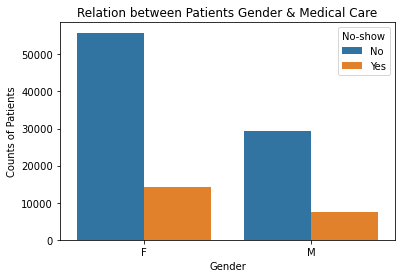

In [14]:
# use seaborn's countplot to specify which gender cares about its medical day
sns.countplot(data=df, x='Gender', hue='No-show')
plt.ylabel('Counts of Patients')
plt.title('Relation between Patients Gender & Medical Care')
plt.show()

It's clear that females care more than males about attending their medical day; it's popular in most countries not only regions that females care about their health than males.

Is being young or old affects people attendance & careness about their health?

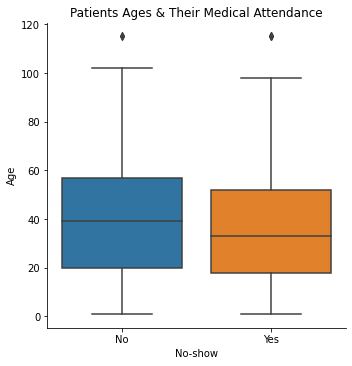

In [15]:
# use seaborn's box plot to check the average of ages who attends or not, exploring their percentages
sns.catplot(data=df, x='No-show', y='Age', kind='box')
plt.title('Patients Ages & Their Medical Attendance')
plt.show()

From the above box plot it's clear that both people ages who attend or not are nearily similar, i predict that their ages don't affect their attendance.

Is being hipertension patient, affects patient to attend more or not?

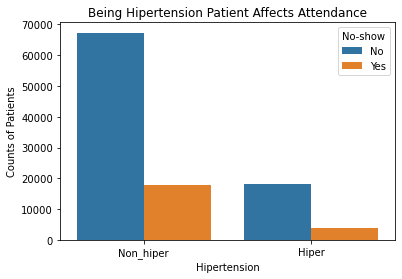

In [16]:
# use seaborn's countplot to see if being hipertension patient affects
sns.countplot(data=df, x='Hipertension', hue='No-show')
plt.ylabel('Counts of Patients')
plt.xticks([0,1], ['Non_hiper', 'Hiper'])
plt.title('Being Hipertension Patient Affects Attendance')
plt.show()

In the above graph it's clear that non_hipertension patients most attend their medical appointments than hipertension ones; i predict that being hipertension or not is an important factor.

Let's explore whether being diabetec or not affect attendance?

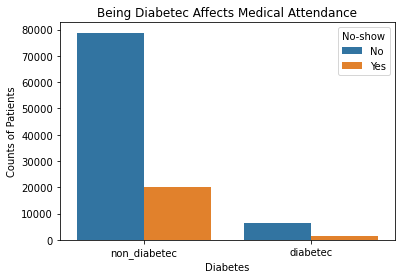

In [17]:
# use seaborn's countplot to check, if being diabetes affect
sns.countplot(data=df, x='Diabetes', hue='No-show')
plt.ylabel('Counts of Patients')
plt.xticks([0, 1], ['non_diabetec', 'diabetec'])
plt.title('Being Diabetec Affects Medical Attendance')
plt.show()

It's also obviously clear that being non_diabetec patient, leads to more medical attendance.

Alcoholism affects patients attendance? let's explore that:

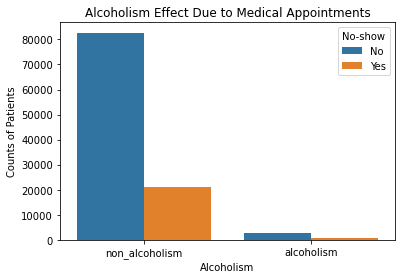

In [18]:
# use seaborn's countplot to check count of alcoholism patients
sns.countplot(data=df, x='Alcoholism', hue='No-show')
plt.ylabel('Counts of Patients')
plt.xticks([0, 1], ['non_alcoholism', 'alcoholism'])
plt.title('Alcoholism Effect Due to Medical Appointments')
plt.show()

From the above graphs; it's obvious that the most important factor that prevent patients to attend their medical appointments, among the three studied diseases is Alcoholism.

Let's have a look at their locations, being in a specific region maybe near to the medical appointment place, affects their attendance & encourage people to attend more?

In [19]:
# specify patients whom attend their medical appointments
medical_attend = df[df['No-show']=='No']

# find most patients region come from to attend their medical appointments & its patients count
max_region = medical_attend['Neighbourhood'].value_counts().idxmax()
max_region_count = medical_attend['Neighbourhood'].value_counts().max()

# print the result in a readable phrase
print("Most patients region that attend their scheduled medical appointments come from {} & they're {} patients.".format(max_region, max_region_count))

Most patients region that attend their scheduled medical appointments come from JARDIM CAMBURI & they're 6154 patients.


In [20]:
# find least patients region come from to attend their medical appointments as well
min_region = medical_attend['Neighbourhood'].value_counts().idxmin()
min_region_count = medical_attend['Neighbourhood'].value_counts().min()

# print the other result in a readable phrase
print("Only {} patient comes from {} to attend hir/her medical appointment.".format(min_region_count, min_region))

Only 1 patient comes from PARQUE INDUSTRIAL to attend hir/her medical appointment.


In [21]:
# specify patients whom don't attend their medical appointments as well
no_medical_attend = df[df['No-show']=='Yes']

# find region that most patients don't come to attend their medical appointments & its patients count also
max_region_no = no_medical_attend['Neighbourhood'].value_counts().idxmax()
max_region_count_no = no_medical_attend['Neighbourhood'].value_counts().max()

# print the other result in a readable phrase
print("Most patients who don't attend their medical appointments come from {} & they're {} patients.".format(max_region_no, max_region_count_no))

Most patients who don't attend their medical appointments come from JARDIM CAMBURI & they're 1432 patients.


In [22]:
# find the region that least number of patients don't attend their medical appointments as well
min_region_no = no_medical_attend['Neighbourhood'].value_counts().idxmin()
min_region_count_no = no_medical_attend['Neighbourhood'].value_counts().min()
print("Least number of patients region that don't attend their scheduled appointments come from {} & that is only {} patient.".format(min_region_no, min_region_count_no))

Least number of patients region that don't attend their scheduled appointments come from AEROPORTO & that is only 1 patient.


From the above, i predict that patients regions affects their attendance, maybe Jardim Camburi region is near to the place of attending the medical appointment.

### Research Question 2  (Let's explore if patients who get Bolsa familia welfare aid attend more?)

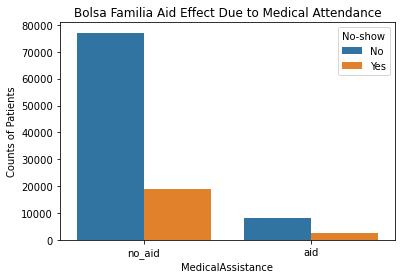

In [23]:
# use seaborn's countplot to explore data, setting x_ticks to whom share Bolsa familia
# & others who don't share in Bolsa familia aid
sns.countplot(data=df, x='MedicalAssistance', hue='No-show')
plt.ylabel('Counts of Patients')
plt.xticks([0,1], ['no_aid', 'aid'])
plt.title('Bolsa Familia Aid Effect Due to Medical Attendance')
plt.show()

The answer is no!! for patients having Bolsa familia aid didn't lead to increase in their numbers, while attending medical appointments in our data set for specific regions.

<a id='conclusions'></a>
## Conclusions

Through this dataset:

1)Brazilian females patients attend their medical appointments than men.

2)Alcoholism is an important factor results in that patients don't attend their medical appointments,being diabetec affects and then hipertension disease as well.

3)Most patients that attend their appointments are from Jardim Camburi region

4)Finally, being a member in the Bolsa familia welfare aid didn't affect patients attendance.

Absolutely, if we've had more data about how many kilometers are between each Brazilian region & the medical appointment clinic, we can explore whether Jardin Camburi region is the nearest region, so near regions faciliate & encourage patients to attend more their appointments.

If we've had data sets about patients whom have done operations or not, so we can explore whether patients did operations, care more to attend their medical appointments or not.

More patients health data sets criterias will be more helpful; like kidney disease history, heart , liver, cancer,etc.

Also, adding data about if they're from special needs or not, will be useful as well.

A great data additioin is knowing whether patients vaccinated or not from different diseases vaccines, so we can explore the importance of being vaccinated & other factors.

Finally, from my point of view it's so important to have more data sets measure the success of these medical appointments, such as measuring patients whom care to attend their appointments had progress in their healths or not, then we can predict if these medical appointments need improvements or not.

<a id='limitations'></a>
### Limitations

Brazil population is over 2 million, so Bolsa familia non effectiveness here due to small data; it's unfair to judge Bolsa familia welfare program progress; hence it has been mentioned as one factor contributing to the reduction of poverty in Brazil in 2008.

Data sets for only three patients diseases are not enough; to be used to explore human health fairly.

Mentioning the nature of the medical appointment is important; if it's a clinic, hospital or a mobile medical service.

<a id='references'></a>
#### References:

Google search, github, wikipedia & datacamp.com

My Udacity's first review